<a href="https://colab.research.google.com/github/indrianiim/Optik/blob/main/TUBES_SKO_Agnesia_Indryany_Mangopo_1101184101_TT42_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Agnesia Indryany Mangopo

1101184101

TT-42-02

In [10]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

In [11]:
#Converter
NtL = lambda x : 10 * np.log10(x)
LtN = lambda x : 10**(x/10)

#Parameter SNR
R = 0.8
SM = 6  
M = -0.23
q = 1.6*10**-19
id = 90*10**-9 
B = 9*10**9 
F = 1 
K = 1.38*10**-23
T = 290 
RL = 50

#Parameter Pr
#Jarak Sentral ke ONU = 20 km
#Jarak ONU ke Roset = <500 m --> 5*19 = 95 m 
#Jarak Total = 20000 + 95 = 20095 m

d = np.arange(0.95,20.096,1) #Jarak (km)
L_Fiber = 0.28 #Berdasarkan jenis G652D (dB)  
N_Splicer = 4 #Jumlah Splicer
L_Splicer = 0.2 #Loss dari splicer (db)
N_Connector = 2 #Jumlah Konektor
L_Connector = 0.3 #Loss dari konektor (dB)
L_Splitter = 16 + 17.5 
Pt = 2 #Daya tx (dBm)

In [12]:
#Rumus Pr
def P_DayaTerima():
  hambatan_fiber = d * L_Fiber
  hambatan_splicer = N_Splicer * L_Splicer
  hambatan_connector = N_Connector * L_Connector

  alfa_total = hambatan_fiber + hambatan_splicer + hambatan_connector + L_Splitter + SM
  Pr = Pt - alfa_total
  return Pr

Pr = P_DayaTerima()
print('Daya Terima = ', Pr)

Daya Terima =  [-39.166 -39.446 -39.726 -40.006 -40.286 -40.566 -40.846 -41.126 -41.406
 -41.686 -41.966 -42.246 -42.526 -42.806 -43.086 -43.366 -43.646 -43.926
 -44.206 -44.486]


In [13]:
#Arus Primer
def Arus_Primer():
  Pr_num = LtN(Pr)
  ip = Pr_num * R
  return ip
ip = Arus_Primer()
print("Arus Primer = ", ip)

Arus Primer =  [9.69370919e-05 9.08845345e-05 8.52098865e-05 7.98895522e-05
 7.49014089e-05 7.02247153e-05 6.58400250e-05 6.17291060e-05
 5.78748645e-05 5.42612741e-05 5.08733090e-05 4.76968817e-05
 4.47187841e-05 4.19266330e-05 3.93088182e-05 3.68544545e-05
 3.45533363e-05 3.23958953e-05 3.03731606e-05 2.84767214e-05]


In [14]:
#Signal Power
def Signal_Power():
  Is_kuadrat = (ip*M)**2
  return Is_kuadrat
Is_kuadrat = Signal_Power()
print('Signal Power = ', Is_kuadrat)

Signal Power =  [4.97090709e-10 4.36953926e-10 3.84092340e-10 3.37625815e-10
 2.96780694e-10 2.60876913e-10 2.29316680e-10 2.01574525e-10
 1.77188547e-10 1.55752722e-10 1.36910150e-10 1.20347105e-10
 1.05787815e-10 9.29898712e-11 8.17401906e-11 7.18514681e-11
 6.31590583e-11 5.55182344e-11 4.88017781e-11 4.28978618e-11]


In [15]:
#Rumus SNR
def SNR():
  BDC = 2*q*id*B*(M**2)*F #Dark Current (Numerik)
  SN = 2*q*ip*B*(M**2)*F #Shot Noise (Numerik)
  NT = (4*K*T*B)/RL #Noise Thermal (Numerik)
  Signal = Is_kuadrat # (Numerik)
  Noise = BDC + SN + NT # (Numerik)

  SNR = Signal / Noise
  SNR_dBm = NtL(SNR)
  return SNR_dBm

SNR = SNR()
print(SNR)

[22.34603757 21.78742053 21.22871754 20.66993391 20.11107465 19.55214444
 18.99314767 18.43408847 17.87497071 17.31579803 16.75657384 16.19730134
 15.63798352 15.0786232  14.51922303 13.95978548 13.40031289 12.84080741
 12.28127112 11.72170591]


In [16]:
#Rumus Q
def Q_rumus():
  Q_rumus = 0.5*(10**(SNR/20))
  return Q_rumus
Q = Q_rumus()
print(Q)

[6.55046127 6.14244152 5.75977981 5.40090701 5.06435029 4.74872725
 4.45274052 4.17517254 3.91488077 3.67079309 3.44190355 3.22726829
 3.02600179 2.83727326 2.66030332 2.49436083 2.33875995 2.19285732
 2.05604947 1.92777037]


In [17]:
#Rumus BER
pengkali_list = []
def BER_rumus():
  akar = 1/(Q * m.sqrt(2 * m.pi))
  for i in range(len(Q)):
    pengkali = m.exp(-(Q[i]**2)/2)
    pengkali_list.append(pengkali)
  BER = (1/akar)*(pengkali_list)
  return BER
BER = BER_rumus()
print(BER)

[7.90478635e-09 9.87540813e-08 9.02863958e-07 6.27214074e-06
 3.42214634e-05 1.50975937e-04 5.52536655e-04 1.71569221e-03
 4.61048457e-03 1.09106632e-02 2.30892805e-02 4.42873705e-02
 7.79129837e-02 1.27036890e-01 1.93741944e-01 2.78608716e-01
 3.80473150e-01 4.96502046e-01 6.22541633e-01 7.53635330e-01]


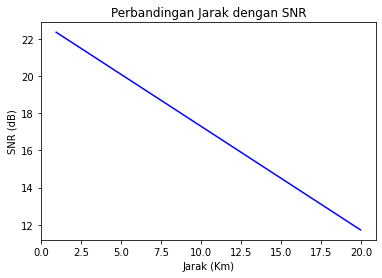

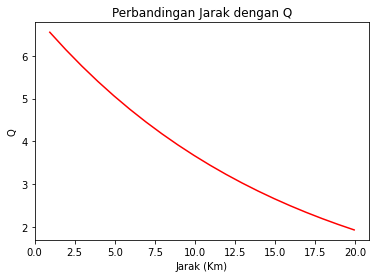

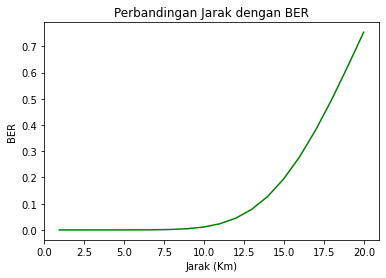

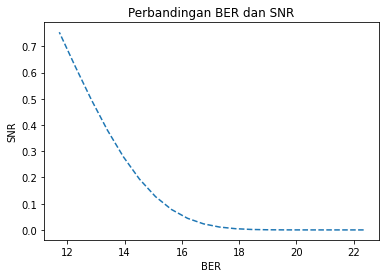

In [18]:
#GRAFIK
def Grafik_SNR():
  plt.figure()
  plt.plot(d,SNR,'b')
  plt.title('Perbandingan Jarak dengan SNR')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('SNR (dB)')
  plt.show()

def Grafik_Q():
  plt.figure()
  plt.plot(d,Q,'r')
  plt.title('Perbandingan Jarak dengan Q')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('Q')
  plt.show()

def Grafik_BER():
  plt.figure()
  plt.plot(d,BER,'g')
  plt.title('Perbandingan Jarak dengan BER')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()

def Grafik_Perbandingan_BER_SNR():
    plt.figure()
    plt.plot(SNR,BER,'--')
    plt.title('Perbandingan BER dan SNR')
    plt.xlabel('BER')
    plt.ylabel('SNR')
    plt.show()

Grafik_SNR()
Grafik_Q()
Grafik_BER()
Grafik_Perbandingan_BER_SNR()